### Machine Learning Algorithm for Handwritten Digits Recognition

---

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('seaborn-darkgrid')

This work aimed to implementing machine learning classification algorithms to recognize handwritten digits using the most simple yet oldschool method known as OLS multiclass classifier. This work belongs to the realm of my curiosity and the sole purpose is to compare this method result to other ML's method that had been done by Ms. Mahnoor Javed (https://towardsdatascience.com/the-best-machine-learning-algorithm-for-handwritten-digits-recognition-2c6089ad8f09)

---
##### Data Loading

---

I will use Sklearn’s load_digits dataset, which is a collection of 8x8 images (64 features)of digits. The dataset contains a total of 1797 sample points.

In [28]:
from sklearn.datasets import load_digits
digits = load_digits(as_frame=True)

<Figure size 432x288 with 0 Axes>

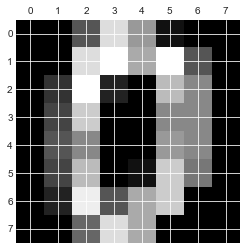

In [29]:
plt.gray() 
plt.matshow(digits.images[0]);

---
##### Data Preparation

---

> _Pixel data to flatten matrix :_

In [30]:
digits.data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [31]:
dg = digits.data.to_numpy()
dg

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

> _Adding target to dg matrix :_

In [32]:
dg = np.column_stack((dg, digits.target))
dg

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  9.,  0.,  2.],
       ...,
       [ 0.,  0.,  1., ...,  0.,  0.,  8.],
       [ 0.,  0.,  2., ...,  0.,  0.,  9.],
       [ 0.,  0., 10., ...,  1.,  0.,  8.]])

In [33]:
dg.shape

(1797, 65)

---
##### Reusable Function

---

> Error Rate :

In [34]:
def error_rate_mc(y, y_hat):
    '''
    Fungsi untuk mencari error rate:
    rate = (n_fn + n_fp) / N

    Parameter
    ----------
        y       : n-vector
                  vektor dari nilai aktual, (+- 1)
        y_hat   : n_vector
                  vektor dari prediksi, (+- 1)
    
    Return
    -------
        rate    : float
                  error rate
    '''
    rate = np.average(y != y_hat)

    return rate

> Confusion Matrix

In [35]:
def confusion_matrix_mc(y, y_hat, K):
    '''
    Fungsi untuk membangun confusion matrix dengan bentuk
    C = [TP,  ..., ...]
        [..., ..., ...]
        [..., ...,  TN]

    Parameter
    ----------
        y       : n-vector
                  vektor dari nilai aktual
        y_hat   : n_vector
                  vektor dari prediksi
        K       : int
                  banyak class yang ingin diprediksi
    
    Return
    -------
        C       : matrix (KxK) int
                  confusion matrix
    '''
    # Buat matrix
    C = np.zeros((K,K))

    # Lakukan pengecekan
    for i in range(K):
        for j in range(K):
            C[i,j] = sum((y == i) & (y_hat == j))
    
    return C

> Row Max Indexing

In [36]:
def row_argmax(u):
    '''
    Fungsi untuk mencari index maximum ditiap data (baris) yang diberikan.
    Contoh:
    A = [1, 2, 3, 4]
        [4, 3, 2, 1]
        [1, 4, 3, 2]

    row_argmax(u=A)
        [3, 0, 1]

    Parameter
    ----------
        u       : matrix (n x m)
                  matrix data yang ingin dicari row max-nya
    
    Return
    -------
        arg_max : vector (n)
                  index elemen maximum tiap row dari matrix u
    '''
    n, m = u.shape
    arg_max = np.array([np.argmax(u[i]) for i in range(n)])

    return arg_max

> Hat Function (y_hat in the making)

In [37]:
def f_hat_mc(x, theta):
    '''
    Fungsi untuk membuat f_hat (fungsi prediksi)

    Parameter
    ----------
        x           : n x N matrix
                      dataset        
        theta       : n x K matrix
                      model parameter

    Return
    -------
        y_hat       : n_vector
                      hasil prediksi dengan output index terbesar tiap row-nya
    '''
    y_hat = row_argmax(x @ theta)  

    return y_hat

> One Hot Encoding (1 -1 class)

In [38]:
def one_hot_encoding(y_cl, K):
    '''
    Fungsi untuk melakukan one-hot-encoding menjadi -1 atau 1

    Parameter
    ----------
        y_cl        : N-vektor
                      vektor target yang ingin dilakukan one hot encoding
        K           : int
                      banyak label/class

    Return
    -------
        Y           : Matriks (N x K)
                      matriks hasil one hot encoding
    '''
    # Inisiasi
    N = len(y_cl)
    Y = np.zeros((N, K)) - 1

    # Buat matriks
    for j in range(K):
        Y[np.where(y_cl == j), j] = 1

    return Y 

> OLS Multiclass Classifier

In [39]:
def ls_multiclass(X, y, K):
    '''
    Fungsi untuk melakukan least square multi-class classification

    Parameter
    ---------
        X           : matriks (n x N)
                      dataset predictor
        y           : n-vektor
                      dataset target
        K           : int
                      banyak label/class

    Return
    -------
        theta       : matriks (n x K)
                      model parameter
        y_hat       : n_vektor
                      prediksi
    '''
    # Inisialisasi
    n, N = X.shape

    # Mencari theta menggunakan least square
    y_one_hot = one_hot_encoding(y_cl=y, K=K)              
    A = np.column_stack([X, np.ones(n)])                   

    # NOTE: 
    # Matriks Anda belum tentu singular, silahkan gunakan `np.linalg.pinv` untuk 
    # melakukan inversi matriks
    theta = np.linalg.pinv(A.T @ A) @ A.T @ y_one_hot       

    # Prediksi
    y_hat = f_hat_mc(A, theta)

    return theta, y_hat

---
##### Learning In Action

---

> **#Using all data for training**

In [40]:
theta, y_hat = ls_multiclass(X=dg[:,:64], y=dg[:,64], K=10)

In [41]:
C = confusion_matrix_mc(y=dg[:,64], y_hat=y_hat, K=10)

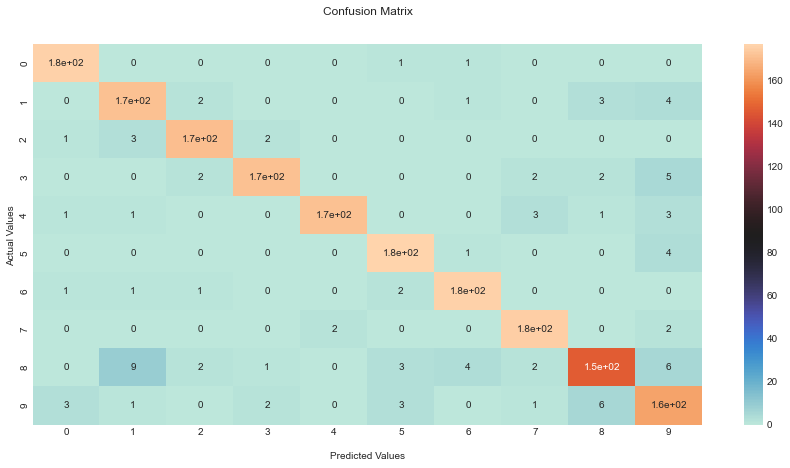

In [42]:
fig, ax = plt.subplots(figsize=(15,7))

sns.heatmap(C, annot=True, cmap='icefire', ax=ax)

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

In [43]:
error_rate = error_rate_mc(y=dg[:,64], y_hat=y_hat)
print(f'error_rate: {100*error_rate:.2f}%')

error_rate: 5.29%


> **#Using split data set (training & test)**

In [44]:
from sklearn.model_selection import train_test_split

_The data is splitted equally for training & testing_

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    dg[:,:64], dg[:,64], test_size=0.5, shuffle=False)

_Training is done to obtain theta as potential classifier identity_

In [46]:
theta, y_hat_train = ls_multiclass(X=X_train, y=y_train, K=10)

_A_mat is a matrix that is composed from X_test and 1 in very last column_

In [47]:
A_mat = np.column_stack((X_test, np.ones(X_test.shape[0])))
A_mat

array([[ 0.,  0.,  1., ...,  1.,  0.,  1.],
       [ 0.,  0.,  6., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 0.,  0.,  1., ...,  0.,  0.,  1.],
       [ 0.,  0.,  2., ...,  0.,  0.,  1.],
       [ 0.,  0., 10., ...,  1.,  0.,  1.]])

_y_hat is calculated by dot multiplier to whole theta and the "row_argmax" function is used to extract the index of highest value from dot product <A_mat @ theta>. It aimed to give us the most possible class by pointing to the highest dot product value_

In [48]:
y_hat = row_argmax(A_mat @ theta)

_Confusion matrix (x=predicted & y=true value)_

In [49]:
C = confusion_matrix_mc(y=y_test, y_hat=y_hat, K=10)

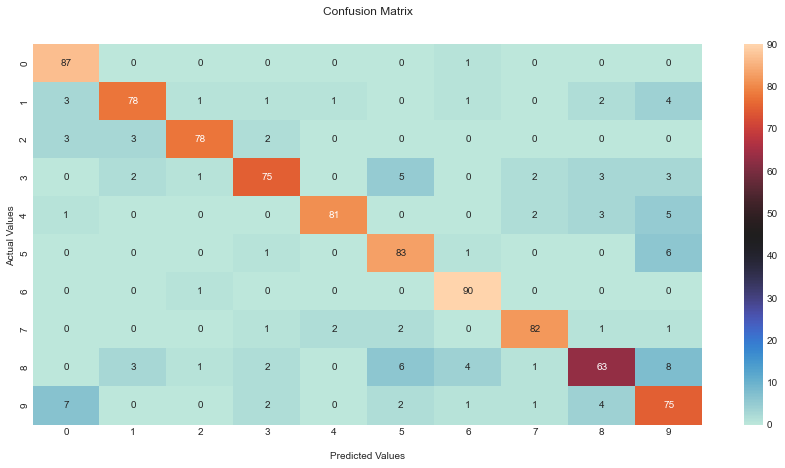

In [50]:
fig, ax = plt.subplots(figsize=(15,7))

sns.heatmap(C, annot=True, cmap='icefire', ax=ax)

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

_Finally, the error rate is calculated as follow:_

In [51]:
error_rate = error_rate_mc(y=y_test, y_hat=y_hat)
print(f'error_rate: {100*error_rate:.2f}%')

error_rate: 11.90%


In [52]:
print(f'accuracy score: {100-100*error_rate:.2f}%')

accuracy score: 88.10%


> when comparing to Ms. Javed's work, this result belongs to rank 4 after SGD. But, it just thin air difference between those model (~1% discrepancy | OLS: 88.10% & SGD: 89.32%)